# Some tips with xarray and pandas

- We have massively different levels here
- Try to make some aims for technical skills you can learn!
- If you are beginning with python --> learn the basics
- If you are good at basic python --> learn new packages
- If you know all the packages --> improve your skills with producing your own software etc. 
- If you don't know git and github --> get better at this!


## print('Hey world')

<span style="color:red;font-weight:700;font-size:20px">
Please feel free to come with suggestions and extra input as we go! 
</span>



<span style="color:blue;font-weight:700;font-size:20px">
Questions:

- How many have used jupyter lab?     
- How many have used pandas? 
- How many have used xarray? 
</span>



## What are pandas and xarray?
- Pandas --> like a spreadsheet 2D data with columns and rows
- xarray --> like pandas, but in N dimensions
- **Use the functionality these packages gives you! Will help you avoid mistakes. Try to get as good as possible :)**


### Pandas
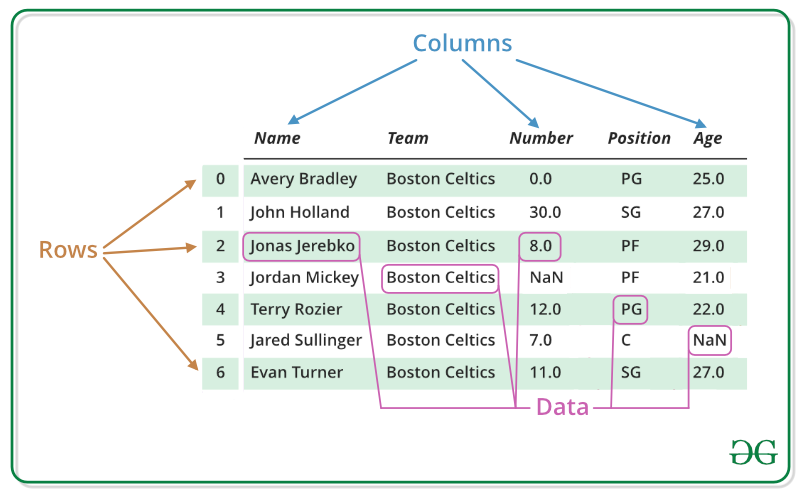
(Source: https://www.geeksforgeeks.org/python-pandas-dataframe/)

### Xarray
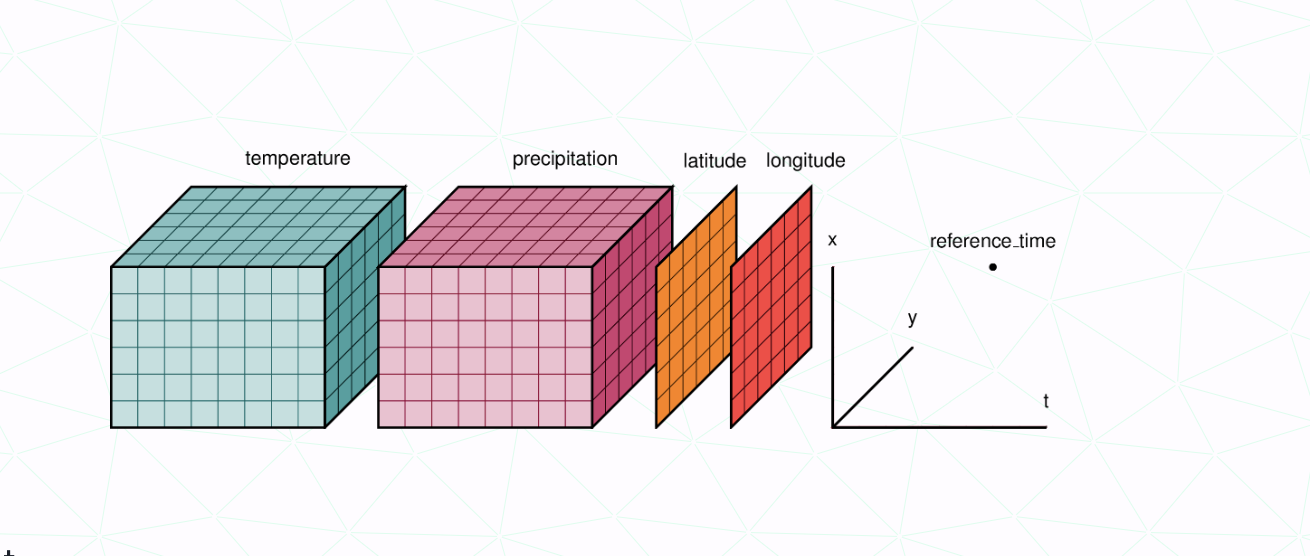
(Source: https://docs.xarray.dev/)

# 1. Read in CMIP6 data: We will skip this next part, but you can check it later to read data: 
#### Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import datetime
import seaborn as sns

### Open CMIP6 online catalog

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60



### Search corresponding data 

Please check [here](https://pangeo-data.github.io/escience-2022/pangeo101/data_discovery.html?highlight=cmip6) for info about CMIP and variables :) 

Particularly useful is maybe the variable search which you find here: https://clipc-services.ceda.ac.uk/dreq/mipVars.html 

In [3]:
cat = col.search(source_id=['CESM2'], experiment_id=['historical'], table_id=['Amon','fx','AERmon'], 
                 variable_id=['tas','hurs', 'areacella','mmrso4' ], member_id=['r1i1p1f1'])
cat.df


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,hurs,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308


### Create dictionary from the list of datasets we found
- This step may take several minutes so be patient!

In [4]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
list(dset_dict.keys())

['CMIP.NCAR.CESM2.historical.fx.gn',
 'CMIP.NCAR.CESM2.historical.AERmon.gn',
 'CMIP.NCAR.CESM2.historical.Amon.gn']

In [7]:
dset_dict

{'CMIP.NCAR.CESM2.historical.fx.gn': <xarray.Dataset> Size: 229kB
 Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                      nbnd: 2)
 Coordinates:
   * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
     lat_bnds        (lat, nbnd) float32 2kB dask.array<chunksize=(192, 2), meta=np.ndarray>
   * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
     lon_bnds        (lon, nbnd) float32 2kB dask.array<chunksize=(288, 2), meta=np.ndarray>
   * member_id       (member_id) object 8B 'r1i1p1f1'
   * dcpp_init_year  (dcpp_init_year) float64 8B nan
 Dimensions without coordinates: nbnd
 Data variables:
     areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
 Attributes: (12/60)
     Conventions:                      CF-1.7 CMIP-6.2
     activity_id:                      CMIP
     branch_method:                    standard
     branc

### Open dataset

- Use `xarray` python package to analyze netCDF dataset
- `open_dataset` allows to get all the metadata without loading data into memory. 
- with `xarray`, we only load into memory what is needed.

In [8]:
ds1 = dset_dict['CMIP.NCAR.CESM2.historical.Amon.gn']
ds2 = dset_dict['CMIP.NCAR.CESM2.historical.fx.gn']
ds3 = dset_dict['CMIP.NCAR.CESM2.historical.AERmon.gn']

In [9]:
ds1

<xarray.Dataset> Size: 876MB
Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 1980, lat: 192,
                     lon: 288, nbnd: 2)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    lat_bnds        (lat, nbnd) float32 2kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float32 2kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: nbnd
Data variables:
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/54)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:member_id:       r1i1p1f1
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.Amon.gn

In [10]:
ds3

<xarray.Dataset> Size: 14GB
Dimensions:         (lev: 32, nbnd: 2, lat: 192, lon: 288, member_id: 1,
                     dcpp_init_year: 1, time: 1980)
Coordinates:
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
    lat_bnds        (lat, nbnd) float64 3kB dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: nbnd
Data variables:
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 14GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 438MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
Attributes: (12/61)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     mmrso4
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.AERmon.gn

<span style="color:black;font-weight:700;font-size:20px">
Since I have already checked that these datasets are on the same grid, we can merge them:
</span>




In [11]:
ds_list = [dset_dict[l].drop('lat_bnds') for l in dset_dict.keys()]
ds = xr.merge(ds_list)

/tmp/ipykernel_11040/2274112695.py:1: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds_list = [dset_dict[l].drop('lat_bnds') for l in dset_dict.keys()]


In [12]:
ds

<xarray.Dataset> Size: 15GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, lev: 32, time: 1980)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 14GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 438MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

## 1.1 Reading in the data from file:

```python
path='filename.nc'
ds = xr.open_dataset(path)
```

##### Opening multiple files:

```python

list_of_files = [
    'file1.nc',
    'file2.nc'
]
xr.open_mfdataset(list_of_files, concat_dim='time',combine='by_coords')
```

# 2. Check how your dataset looks

#### Different types of information/data:
- Coordinates
- Data variables
- Global attributes
- Variable attributes

In [13]:
ds

<xarray.Dataset> Size: 15GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, lev: 32, time: 1980)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 14GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 438MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

# 3. Sometimes we want to do some nice tweaks before we start: 

### Selecting data and super quick plotting:

xarray loads data only when it needs to (it's lazy, Anne can explain), and you might want to early on define the subset of data you want to look at so that you don't end up loading a lot of extra data. 


##### See [here](http://xarray.pydata.org/en/stable/user-guide/indexing.html) for nice overview

In order to reduce unecessary calculations and loading of data, think about which part of the data you want, and slice early on. 

### Slice in time: the sel method

In [14]:
ds

<xarray.Dataset> Size: 15GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, lev: 32, time: 1980)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * time            (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:...
    time_bnds       (time, nbnd) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 14GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 438MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 438MB dask.array<chunksize=(1, 1, 600, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

In [15]:
dss = ds.sel(time = slice('1990-01-01','2010-01-01'))

In [16]:
dss

<xarray.Dataset> Size: 2GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, lev: 32, time: 240)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * time            (time) object 2kB 1990-01-15 12:00:00 ... 2009-12-15 12:0...
    time_bnds       (time, nbnd) object 4kB dask.array<chunksize=(240, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 53MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn


<span style="color:red;font-weight:700;font-size:20px">
NB: Always check that the function you are using is doing what you expect!
</span>


You might even select only the arctic e.g.: 

#### isel, sel: index selecting 

Select the surface (which in this case is the last index :) 

In [17]:
dss

<xarray.Dataset> Size: 2GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, lev: 32, time: 240)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * time            (time) object 2kB 1990-01-15 12:00:00 ... 2009-12-15 12:0...
    time_bnds       (time, nbnd) object 4kB dask.array<chunksize=(240, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 53MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

In [18]:
dss_s = dss.isel(lev=-1)

In [19]:
dss_s

<xarray.Dataset> Size: 213MB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, time: 240)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    b_bnds          (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    lev             float64 8B -992.6
    lev_bnds        (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * time            (time) object 2kB 1990-01-15 12:00:00 ... 2009-12-15 12:0...
    time_bnds       (time, nbnd) object 4kB dask.array<chunksize=(240, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               float64 8B dask.array<chunksize=(), meta=np.ndarray>
    b               float64 8B dask.array<chunksize=(), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 10, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 53MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

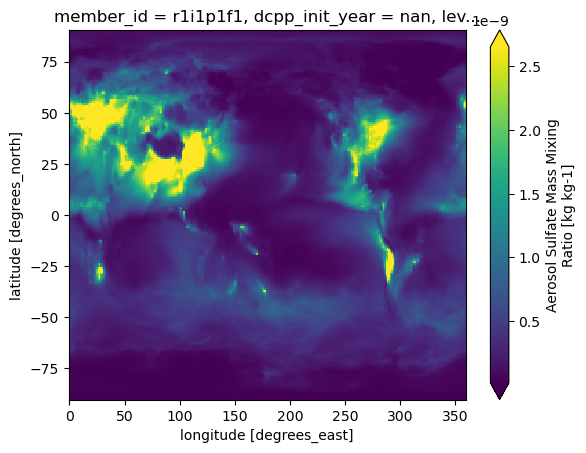

In [20]:
dss_s['mmrso4'].isel(time=0).plot(robust=True)

## 3.2 Calculates variables and assign attributes! 
Nice for plotting and to keep track of what is in your dataset (especially 'units' and 'standard_name'/'long_name' will be looked for by xarray.

In [21]:
dss['T_C'] = dss['tas']-273.15

In [22]:
dss['T_C'] = dss['T_C'].assign_attrs({'units': '$^\circ$C'})

In [23]:
dss['T_C']

<xarray.DataArray 'T_C' (member_id: 1, dcpp_init_year: 1, time: 240, lat: 192,
                         lon: 288)> Size: 53MB
dask.array<sub, shape=(1, 1, 240, 192, 288), dtype=float32, chunksize=(1, 1, 120, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * time            (time) object 2kB 1990-01-15 12:00:00 ... 2009-12-15 12:0...
Attributes:
    units:    $^\circ$C

<span style="color:green;font-weight:700;font-size:20px">
May always be small things you need to adjust: 
</span>



In [24]:
dss['time']

<xarray.DataArray 'time' (time: 240)> Size: 2kB
array([cftime.DatetimeNoLeap(1990, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1990, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2009, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2009, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2kB 1990-01-15 12:00:00 ... 2009-12-15 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    title:          time
    type:           double

This calendar is in cftime and noLeap. Sometimes this causes issues when plotting timeseries, so just for fun we will convert to normal calendar because it's anyway monthly.

In [25]:
dss['time'] = dss['time'].to_dataframe().index.to_datetimeindex()

/tmp/ipykernel_11040/4195133999.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dss['time'] = dss['time'].to_dataframe().index.to_datetimeindex()


In [26]:
dss['time']

<xarray.DataArray 'time' (time: 240)> Size: 2kB
array(['1990-01-15T12:00:00.000000000', '1990-02-14T00:00:00.000000000',
       '1990-03-15T12:00:00.000000000', ..., '2009-10-15T12:00:00.000000000',
       '2009-11-15T00:00:00.000000000', '2009-12-15T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2kB 1990-01-15T12:00:00 ... 2009-12-15T12:...


<span style="color:green;font-weight:700;font-size:20px">
We get a warning, but it's ok as long as we know what we are doing. 
</span>




### 3.3 Convert longitude: 
this data comes in 0--360 degrees, but often -180 to 180 is more convenient. So we can convert:

**NOTE:** Maybe you want to put this in a module? Or a package.. 

In [27]:
dss

<xarray.Dataset> Size: 2GB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     nbnd: 2, lev: 32, time: 240)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * time            (time) datetime64[ns] 2kB 1990-01-15T12:00:00 ... 2009-12...
    time_bnds       (time, nbnd) object 4kB dask.array<chunksize=(240, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time, lev, lat, lon) float32 2GB dask.array<chunksize=(1, 1, 10, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time, lat, lon) float32 53MB dask.array<chunksize=(10, 192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
    T_C             (member_id, dcpp_init_year, time, lat, lon) float32 53MB dask.array<chunksize=(1, 1, 120, 192, 288), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

In [28]:
def convert_lon_to_180(ds):
    ds['lon'] =(ds['lon']+ 180) % 360 - 180
    ds = ds.sortby('lon')
    return ds

def convert_lon_to_360(ds):
    ds['lon'] =ds['lon']% 360
    ds = ds.sortby('lon')
    return lon % 360

(migth want to move this to a module!) 

In [29]:
dss = convert_lon_to_180(dss)

In [30]:
dss['lon'].attrs['units'] = '$^\circ$ East'

Notice how the labels use both the attribute "standard_name" and "units" from the dataset. 

# 4. The easiest interpolation: select with 'nearest' neighboor

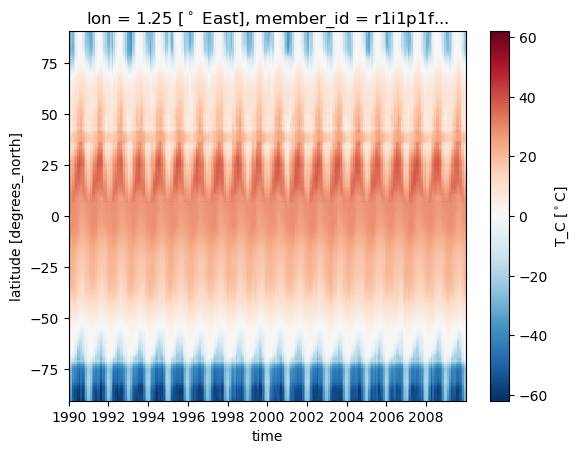

In [31]:
dss['T_C'].sel(lon=1.3,method='nearest').plot(x='time')

Example: let's select zeppelin station: 
78.906661, 11.889203

In [32]:
lat_zep =78.906661
lon_zep = 11.889203

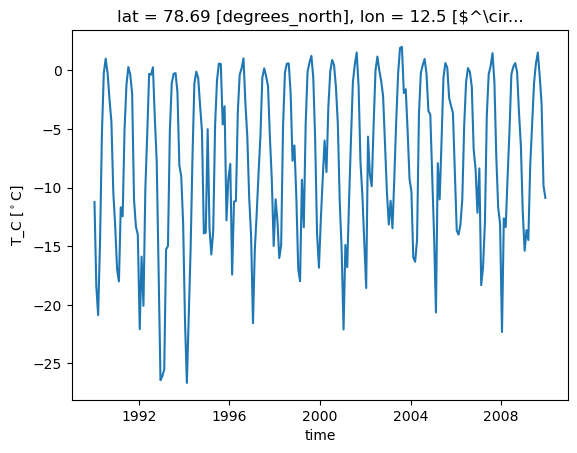

In [33]:
dss['T_C'].sel(lon=lon_zep, lat=lat_zep, method='nearest').plot()

### Super quick averaging etc

In [34]:
da_so4 = dss['mmrso4']


Mean: 
  

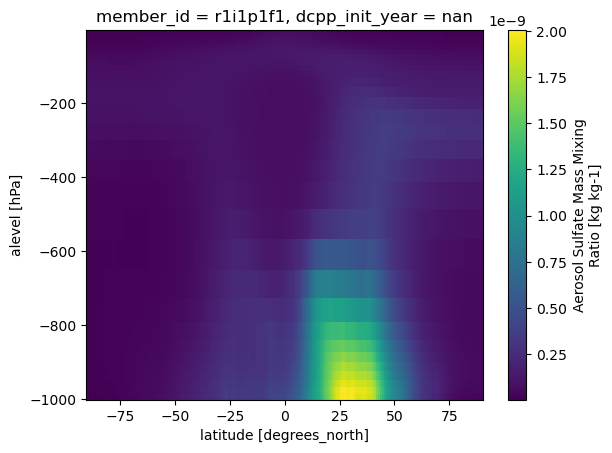

In [35]:
da_so4.mean(['time','lon'], keep_attrs=True).plot()#ylim=[1000,100], yscale='log')

In [36]:
da_so4['lev'] = np.abs(da_so4['lev'].values)

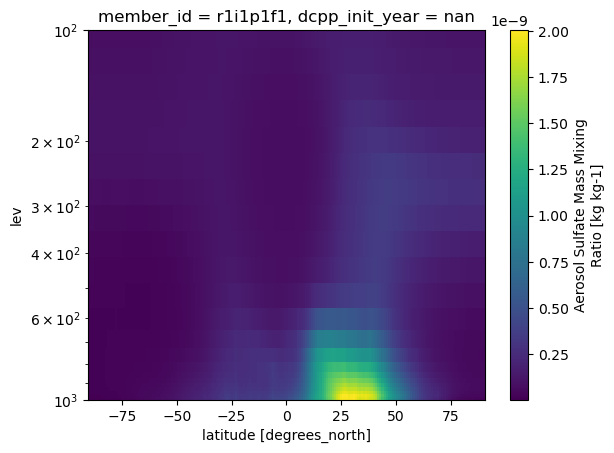

In [37]:
da_so4.mean(['time','lon'], keep_attrs=True).plot(ylim=[1000,100], yscale='log')

Standard deviation

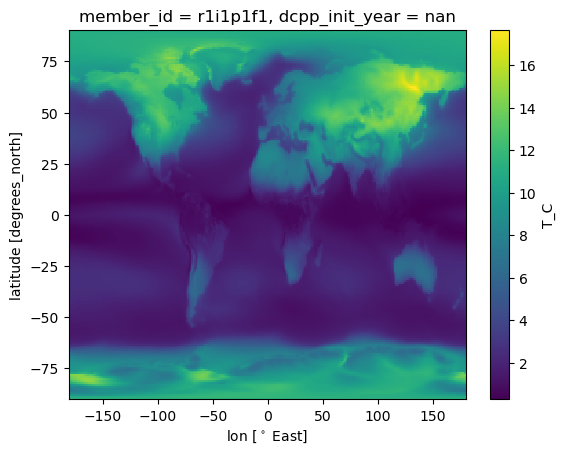

In [38]:
dss['T_C'].std(['time']).plot()

Temperature change much stronger over land than ocean...

## Mask data and groupby: pick out seasons

In [39]:
month = ds['time.month']

In [40]:
month

<xarray.DataArray 'month' (time: 1980)> Size: 16kB
array([ 1,  2,  3, ..., 10, 11, 12])
Coordinates:
  * time     (time) object 16kB 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [41]:
dss_JA = dss.where(month.isin([7,8])).mean('time')

In [42]:
dss_JA

<xarray.Dataset> Size: 8MB
Dimensions:         (member_id: 1, dcpp_init_year: 1, lat: 192, lon: 288,
                     lev: 32, nbnd: 2)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    a               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    b               (lev) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, lev, lat, lon) float32 7MB dask.array<chunksize=(1, 1, 32, 192, 288), meta=np.ndarray>
    p0              float32 4B nan
    ps              (lat, lon) float32 221kB dask.array<chunksize=(192, 288), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>
    T_C             (member_id, dcpp_init_year, lat, lon) float32 221kB dask.array<chunksize=(1, 1, 192, 288), meta=np.ndarray>

In [43]:
dss_season = dss.groupby('time.season').mean(keep_attrs=True)

In [44]:
dss_season

<xarray.Dataset> Size: 33MB
Dimensions:         (season: 4, member_id: 1, dcpp_init_year: 1, lev: 32,
                     lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
    lon_bnds        (lon, nbnd) float64 5kB dask.array<chunksize=(288, 2), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
    b_bnds          (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * lev             (lev) float64 256B -3.643 -7.595 -14.36 ... -976.3 -992.6
    lev_bnds        (lev, nbnd) float64 512B dask.array<chunksize=(32, 2), meta=np.ndarray>
  * season          (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: nbnd
Data variables:
    mmrso4          (season, member_id, dcpp_init_year, lev, lat, lon) float32 28MB dask.array<chunksize=(4, 1, 1, 32, 192, 288), meta=np.ndarray>
    ps              (season, lat, lon) float32 885kB dask.array<chunksize=(4, 192, 288), meta=np.ndarray>
    hurs            (season, member_id, dcpp_init_year, lat, lon) float32 885kB dask.array<chunksize=(4, 1, 1, 192, 288), meta=np.ndarray>
    tas             (season, member_id, dcpp_init_year, lat, lon) float32 885kB dask.array<chunksize=(4, 1, 1, 192, 288), meta=np.ndarray>
    T_C             (season, member_id, dcpp_init_year, lat, lon) float32 885kB dask.array<chunksize=(4, 1, 1, 192, 288), meta=np.ndarray>
    areacella       (season, member_id, dcpp_init_year, lat, lon) float32 885kB dask.array<chunksize=(4, 1, 1, 192, 288), meta=np.ndarray>
    a               (season, lev) float64 1kB dask.array<chunksize=(4, 32), meta=np.ndarray>
    b               (season, lev) float64 1kB dask.array<chunksize=(4, 32), meta=np.ndarray>
    p0              (season) float32 16B 1e+05 1e+05 1e+05 1e+05
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

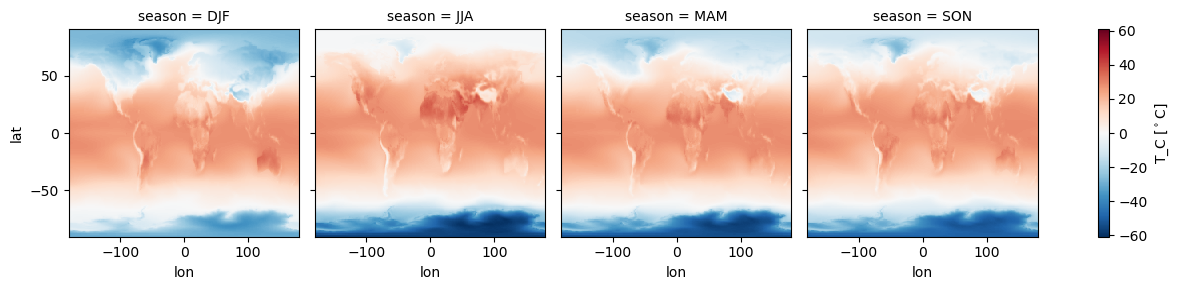

In [45]:
dss_season['T_C'].plot(col='season')

## Controle the plot visuals:

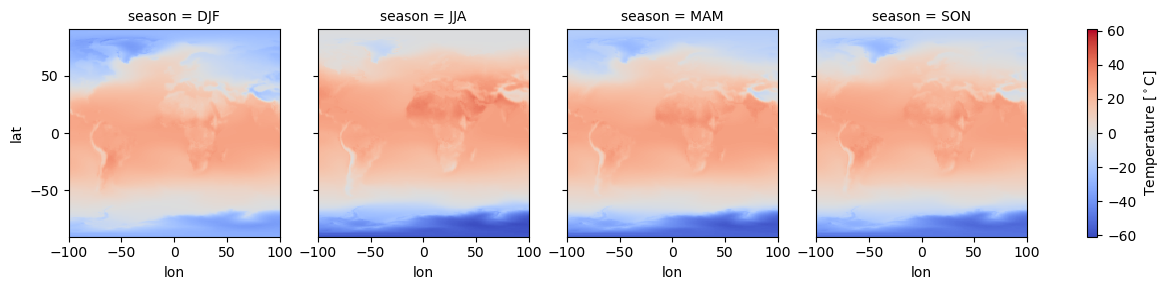

In [46]:
dss_season['T_C'].plot(col='season',
                       cmap = 'coolwarm',#ax=ax,
                       xlim=[-100,100],
                       cbar_kwargs={'label':'Temperature [$^\circ$C]'}
                      )

# 5. Plotting with cartopy

In [47]:
import cartopy as cy
import cartopy.crs as ccrs

In [48]:
da_plt = dss['mmrso4'].isel(lev=-1).mean('time', keep_attrs=True).squeeze()#('member_id')

In [49]:
da_plt

<xarray.DataArray 'mmrso4' (lat: 192, lon: 288)> Size: 221kB
dask.array<getitem, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat             (lat) float64 2kB -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon             (lon) float64 2kB -180.0 -178.8 -177.5 ... 176.2 177.5 178.8
    member_id       <U8 32B 'r1i1p1f1'
    dcpp_init_year  float64 8B nan
    lev             float64 8B -992.6
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        Dry mass of sulfate (SO4) in aerosol particles as a fract...
    description:    Dry mass of sulfate (SO4) in aerosol particles as a fract...
    frequency:      mon
    id:             mmrso4
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Aerosol Sulfate Mass Mixing Ratio
    type:           real
    units:          kg kg-1
    variable_id:    mmrso4

In [50]:
from matplotlib.colors import LogNorm

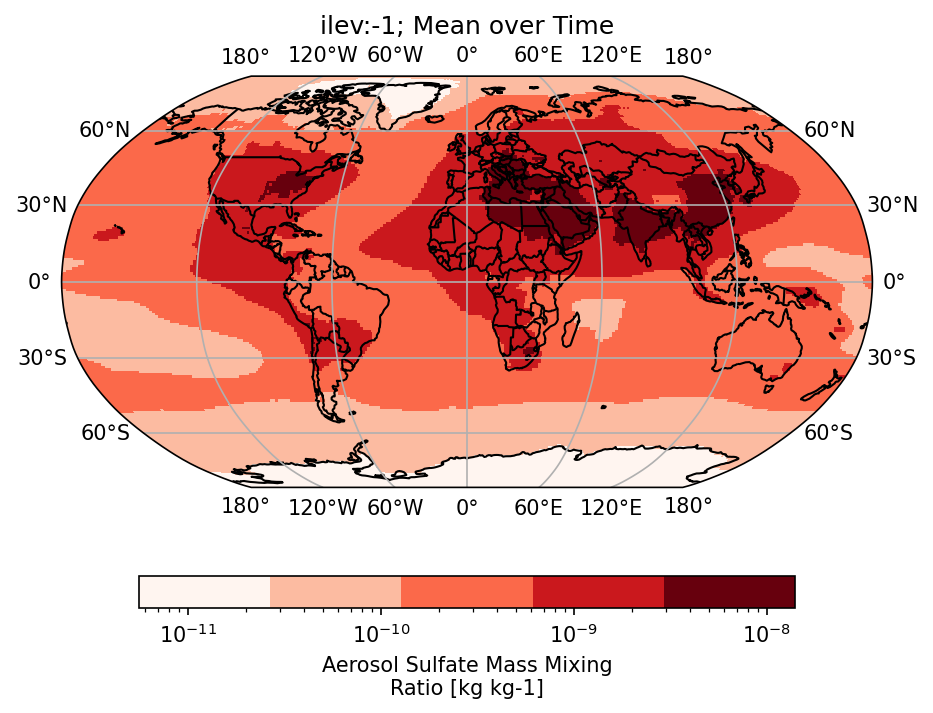

In [51]:
f,ax = plt.subplots(1,1,dpi=150,subplot_kw={'projection':ccrs.Robinson()})


da_plt.plot.pcolormesh(
    cmap = plt.get_cmap('Reds'),
    ax=ax,
    norm = LogNorm(),
    cbar_kwargs={
        #'label':'Wind Speed [m/s]', 
        'orientation':'horizontal',
        'shrink':.8
    },
    transform=ccrs.PlateCarree(), 
    #x='lon',y='lat',
    levels = 6
)
ax.set_title('ilev:-1; Mean over Time')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
#gl.xlabels_top = False
#gl.ylabels_right = False
#gl.top_labels(False)
ax.add_feature(cy.feature.BORDERS);
f.tight_layout()

# 6. Global average: weighted means!

In [52]:
dss['T_C'].mean().compute()

<xarray.DataArray 'T_C' ()> Size: 4B
array(5.447856, dtype=float32)

In [53]:
dss['T_C'].weighted(dss['areacella']).mean().compute()

<xarray.DataArray 'T_C' ()> Size: 4B
array(14.715081, dtype=float32)

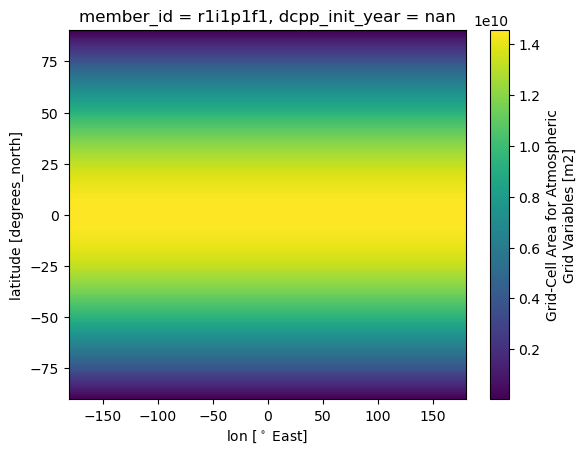

In [54]:
dss['areacella'].plot()

# 7. Convert to pandas & do some random fun stuff: 

Maybe we e.g. want to compare with a station, or just use some of the considerable functionalities available from pandas. It's easy to convert back and forth between xarray and pandas:

<span style="color:green;font-weight:700;font-size:20px">
A lot of these functions also exist in xarray!
</span>



## Pick out station: 

In [55]:
lat_kristineberg = 58.24
lon_kristineberg = 11.44
# pick out surface
ds_surf =dss.isel(lev=-1)
ds_kristineberg = ds_surf.sel(lat=lat_kristineberg, lon = lon_kristineberg, method ='nearest')

In [56]:
ds_kristineberg

<xarray.Dataset> Size: 11kB
Dimensions:         (member_id: 1, dcpp_init_year: 1, nbnd: 2, time: 240)
Coordinates:
    lat             float64 8B 57.96
    lon             float64 8B 11.25
    lon_bnds        (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    a_bnds          (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    b_bnds          (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    lev             float64 8B -992.6
    lev_bnds        (nbnd) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2kB 1990-01-15T12:00:00 ... 2009-12...
    time_bnds       (time, nbnd) object 4kB dask.array<chunksize=(240, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella       (member_id, dcpp_init_year) float32 4B dask.array<chunksize=(1, 1), meta=np.ndarray>
    a               float64 8B dask.array<chunksize=(), meta=np.ndarray>
    b               float64 8B dask.array<chunksize=(), meta=np.ndarray>
    mmrso4          (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 10), meta=np.ndarray>
    p0              float32 4B ...
    ps              (time) float32 960B dask.array<chunksize=(10,), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 120), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 120), meta=np.ndarray>
    T_C             (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 120), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

In [57]:
vl = ['mmrso4','hurs','tas','T_C']

In [58]:
ds_kristineberg[vl]

<xarray.Dataset> Size: 6kB
Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 240)
Coordinates:
    lat             float64 8B 57.96
    lon             float64 8B 11.25
  * member_id       (member_id) object 8B 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
    lev             float64 8B -992.6
  * time            (time) datetime64[ns] 2kB 1990-01-15T12:00:00 ... 2009-12...
Data variables:
    mmrso4          (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 10), meta=np.ndarray>
    hurs            (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 120), meta=np.ndarray>
    tas             (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 120), meta=np.ndarray>
    T_C             (member_id, dcpp_init_year, time) float32 960B dask.array<chunksize=(1, 1, 120), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    branch_time_in_parent:            219000.0
    case_id:                          15
    ...                               ...
    intake_esm_attrs:variable_id:     areacella
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/NCAR/CESM2/histor...
    intake_esm_attrs:version:         20190308
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.fx.gn

### Resample:

In [63]:
df_kristineberg = ds_kristineberg[vl].squeeze().to_dataframe()

In [64]:
df_kristineberg

,mmrso4,hurs,tas,T_C,lat,lon,member_id,dcpp_init_year,lev
time,,,,,,,,,
1990-01-15 12:00:00,9.319389e-10,85.651199,277.036011,3.886017,57.958115,11.25,r1i1p1f1,NaN,-992.556095
1990-02-14 00:00:00,9.139207e-10,79.779701,273.601807,0.451813,57.958115,11.25,r1i1p1f1,NaN,-992.556095
1990-03-15 12:00:00,1.282672e-09,82.473785,277.405701,4.255707,57.958115,11.25,r1i1p1f1,NaN,-992.556095
1990-04-15 00:00:00,7.225737e-10,79.588730,280.137329,6.987335,57.958115,11.25,r1i1p1f1,NaN,-992.556095
1990-05-15 12:00:00,2.263646e-09,80.421875,283.043152,9.893158,57.958115,11.25,r1i1p1f1,NaN,-992.556095
...,...,...,...,...,...,...,...,...,...
2009-08-15 12:00:00,6.469142e-10,82.338539,290.292358,17.142365,57.958115,11.25,r1i1p1f1,NaN,-992.556095
2009-09-15 00:00:00,6.174767e-10,75.105225,288.502136,15.352142,57.958115,11.25,r1i1p1f1,NaN,-992.556095
2009-10-15 12:00:00,5.226203e-10,81.029533,284.518219,11.368225,57.958115,11.25,r1i1p1f1,NaN,-992.556095


In [66]:
df_yearly = df_kristineberg.resample('YE').mean(numeric_only=True)#.plot()

<Axes: xlabel='time'>

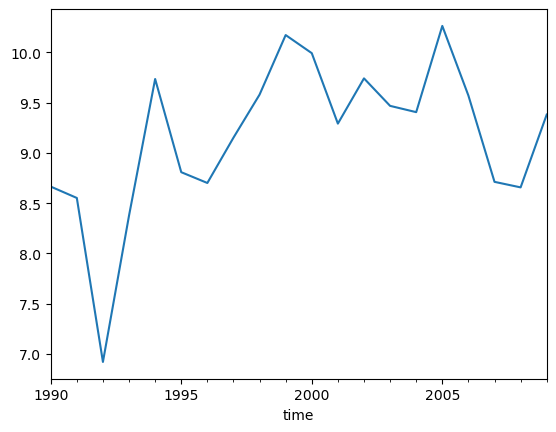

In [67]:
df_yearly['T_C'].plot()

In [70]:
df_kristineberg['season'] = df_kristineberg.to_xarray()['time.season']



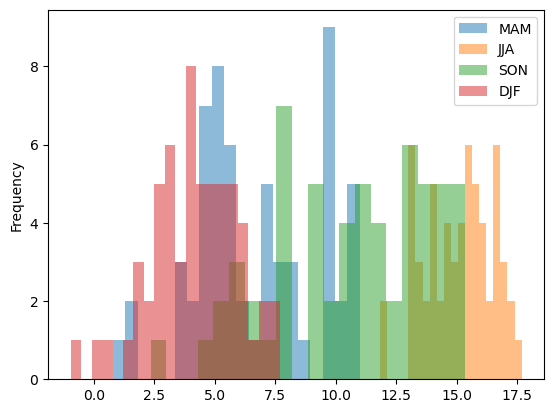

In [71]:
for s in ['MAM','JJA','SON','DJF']:
    df_kristineberg[df_kristineberg['season']==s]['T_C'].plot.hist(alpha=0.5, bins=20, label=s)
    
plt.legend()

In [72]:
df = dss.isel(lev=-1)[vl].to_dataframe()

In [73]:
df_ri = df.reset_index()
df_ri.head()

,member_id,dcpp_init_year,time,lat,lon,mmrso4,hurs,tas,T_C,lev
0,r1i1p1f1,NaN,1990-01-15 12:00:00,-90.0,-180.00,2.049096e-11,98.689842,242.897797,-30.252197,-992.556095
1,r1i1p1f1,NaN,1990-01-15 12:00:00,-90.0,-178.75,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095
2,r1i1p1f1,NaN,1990-01-15 12:00:00,-90.0,-177.50,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095
3,r1i1p1f1,NaN,1990-01-15 12:00:00,-90.0,-176.25,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095
4,r1i1p1f1,NaN,1990-01-15 12:00:00,-90.0,-175.00,2.049095e-11,98.675537,242.903198,-30.246796,-992.556095


### lets do something unnecesarily complicated :D 

## qcut, cut

qcut splits the data into quantile ranges

In [74]:


df_ri['hurs_cat'] = pd.qcut(df_ri['hurs'],
                            q=[0.05,0.17, 0.34,0.66, 0.83,0.95],
                            labels=['very low','low','med','high','very high'])

Cut cuts into categories

In [75]:
df_ri['lat_cat'] = pd.cut(df_ri['lat'], [-90,-60,-30,0,30,60,90], 
                          labels=['S polar','S mid','S tropics', 'N tropic', 'N mid','N polar'])

In [ ]:
df_ri.groupby('lat_cat').mean()

/tmp/ipykernel_11040/3604578940.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_ri.groupby('lat_cat').mean()


In [ ]:
sns.boxenplot(x="lat_cat", y="hurs",
              color="b",
              scale="linear", data=df_ri)

In [ ]:
sns.boxenplot(x="hurs_cat", y="mmrso4",
              color="b",
              scale="linear", data=df_ri,
             )

In [ ]:
sns.displot(x="mmrso4",hue = 'lat_cat',log_scale=True,kind='kde',
            data=df_ri,  multiple="stack")

## Convert back to xarray if we need:

In [ ]:
ds_new = df_ri.set_index(['time','lat','lon']).to_xarray()

In [ ]:
ds_new

### mask by category 

In [ ]:
ds_new.where(ds_new['hurs_cat']=='very low').mean(['time','lon'])['mmrso4'].plot(label='very low')#vmin = 0, vmax = 1.5e-8)
ds_new.where(ds_new['hurs_cat']=='low').mean(['time','lon'])['mmrso4'].plot(label='low')#vmin = 0, vmax = 1.5e-8)

ds_new.where(ds_new['hurs_cat']=='high').mean(['time','lon'])['mmrso4'].plot(label='high')#vmin = 0, vmax = 1.5e-8)
ds_new.where(ds_new['hurs_cat']=='very high').mean(['time','lon'], keep_attrs=True)['mmrso4'].plot(label='very high')#vmin = 0, vmax = 1.5e-8)
plt.legend()